In [1]:
!ls

001_repaso_python.ipynb
002_mls.ipynb
003_RLM_aplicacion.ipynb
004_multicolinealidad.ipynb
005_analisis_residuos.ipynb
006_conjuntos_entrenamiento_validacion.ipynb
Advertising.csv
GE.csv
NYC.csv
Prestige.csv
README.md
all_perth_310121.csv
bad-rp.png
exm_dep_par_1.ipynb
good-rp.png
pop.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./NYC.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
df = df.drop(columns=['id', 'dropoff_datetime', 'store_and_fwd_flag'])
df.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,455
1,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,663
2,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,429
4,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,435


In [9]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,455
1,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,663
2,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,429
4,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,435


In [10]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['minute'] = df['pickup_datetime'].dt.minute
df['hour'] = df['pickup_datetime'].dt.hour
df['second'] = df['pickup_datetime'].dt.second
df = df.drop(columns=['pickup_datetime'])
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,year,month,day,minute,hour,second
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,2016,3,14,24,17,55
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,2016,6,12,43,0,35
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,2016,1,19,35,11,24
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,2016,4,6,32,19,31
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,2016,3,26,30,13,55


In [11]:
Y = df['trip_duration']
X = df.drop(columns=['trip_duration'])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [18]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [19]:
Y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import r2_score

In [22]:
r2_score(Y_test, Y_pred)

0.002838171937352585

In [23]:
import matplotlib.pyplot as plt

In [24]:
E = Y_test - Y_pred

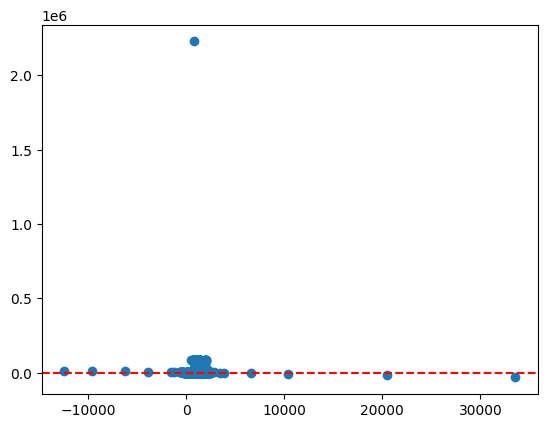

In [26]:
plt.scatter(Y_pred, E)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()